-----------------------736------------------------
ID = 736
source = legacy
manufacturer = Generic
name = ЭЦН4-30
stages_max = 582
rate_nom_sm3day = 30
rate_opt_min_sm3day = 20
rate_opt_max_sm3day = 40
rate_max_sm3day = 66
slip_nom_rpm = 2820
freq_Hz = 50
eff_max = 0.4
height_stage_m = 0.035
Series = 4
d_od_mm = 86
d_cas_min_mm = 112
d_shaft_mm = 17
area_shaft_mm2 = 227
power_limit_shaft_kW = 72
power_limit_shaft_high_kW = 120
power_limit_shaft_max_kW = 150
pressure_limit_housing_atma = 390
d_motor_od_mm = 95
rate_points = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 66]
head_points = [4.88, 4.73, 4.66, 4.61, 4.52, 4.35, 4.1, 3.74, 3.28, 2.73, 2.11, 1.45, 0.77, 0]
power_points = [0.02, 0.022, 0.025, 0.027, 0.03, 0.032, 0.035, 0.038, 0.041, 0.043, 0.046, 0.049, 0.052, 0.055]
eff_points = [0, 0.12, 0.21, 0.29, 0.35, 0.38, 0.4, 0.39, 0.37, 0.32, 0.26, 0.19, 0.1, 0]
-----------------------737------------------------
ID = 737
source = legacy
manufacturer = Generic
name = ЭЦН5-125
stag

array(17.55936091)

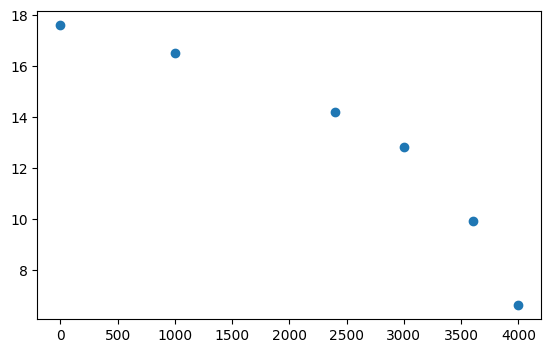

In [1]:
import json
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Opening JSON file
f = open("ESP_json.db")
  
# returns JSON object as 
# a dictionary
data = json.load(f)
f.close()


ID = '879'

# Iterating through the json
# list

for i in data:
    print(f'{i:-^50}')
    for j in data[i]:
        print(j,"=",data[i][j])
        
def ESP_Head(ID,Q):
    
    cs = CubicSpline(data[ID]['rate_points'], data[ID]['head_points'])
    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.plot(data[ID]['rate_points'], data[ID]['head_points'], 'o', label='data')
    return cs(Q)

ESP_Head(ID,50)

покажем характеристики ЭЦН на графике

ESP_ID = 879
rate_points = [0, 1000, 2400, 3000, 3600, 4000]
head_points = [17.6, 16.5, 14.2, 12.8, 9.9, 6.6]


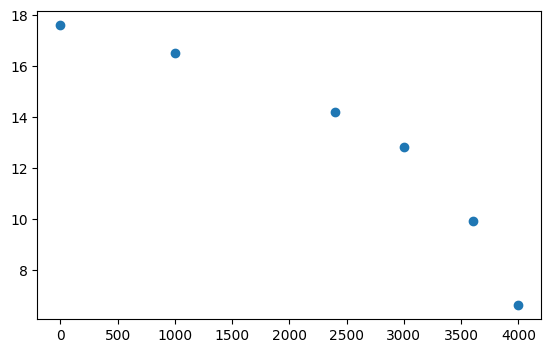

In [2]:
print("ESP_ID = {}".format(ID))
print("rate_points = {}".format(data[ID]['rate_points']))
print("head_points = {}".format(data[ID]['head_points']))

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(data[ID]['rate_points'], data[ID]['head_points'], 'o', label='data')
